<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Handling-Missing-Data" data-toc-modified-id="Handling-Missing-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Handling Missing Data</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Comments-From-Domain-Expert" data-toc-modified-id="Comments-From-Domain-Expert-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Comments From Domain Expert</a></span></li><li><span><a href="#Missing-Values-Bar-Plot" data-toc-modified-id="Missing-Values-Bar-Plot-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Missing Values Bar Plot</a></span></li><li><span><a href="#Correlation-Heatmap-for-Missing-Values" data-toc-modified-id="Correlation-Heatmap-for-Missing-Values-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Correlation Heatmap for Missing Values</a></span></li><li><span><a href="#Dendrogram" data-toc-modified-id="Dendrogram-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Dendrogram</a></span></li></ul></li><li><span><a href="#Imputation" data-toc-modified-id="Imputation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imputation</a></span><ul class="toc-item"><li><span><a href="#PCNeg" data-toc-modified-id="PCNeg-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>PCNeg</a></span></li><li><span><a href="#IPG" data-toc-modified-id="IPG-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>IPG</a></span></li></ul></li></ul></li></ul></div>

# Handling Missing Data 

In [ ]:
# this is the extra library for the analysis
# Run this cell to install to your environment if you dont have it.
!pip install missingno

In [3]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

## Analysis

Lets load the data once again.

In [4]:
df = pd.read_pickle('../data/data.pickle')

### Comments From Domain Expert

1. PCNeg has several missing values because the PCA  is performed so that (in general) there is no negative component (so PCNeg is set to NaN). However when the behavior is biphasic, this is not the case and PCNeg has a defined value

2. When IPG is 1, it means that pacemaker influenced the reading. Thus, it is set to NaN any value that was influenced and was not a physiological response of the patient (otherwise values would be a measure of the pacemaker parameters).

So for case 1) it could make sense either to replace the NaN with 0 or to introduce a new boolean feature to identify when PCNeg is (or is not) NaN.

### Missing Values Bar Plot 

This plot shown the count of non-missing values for each column.

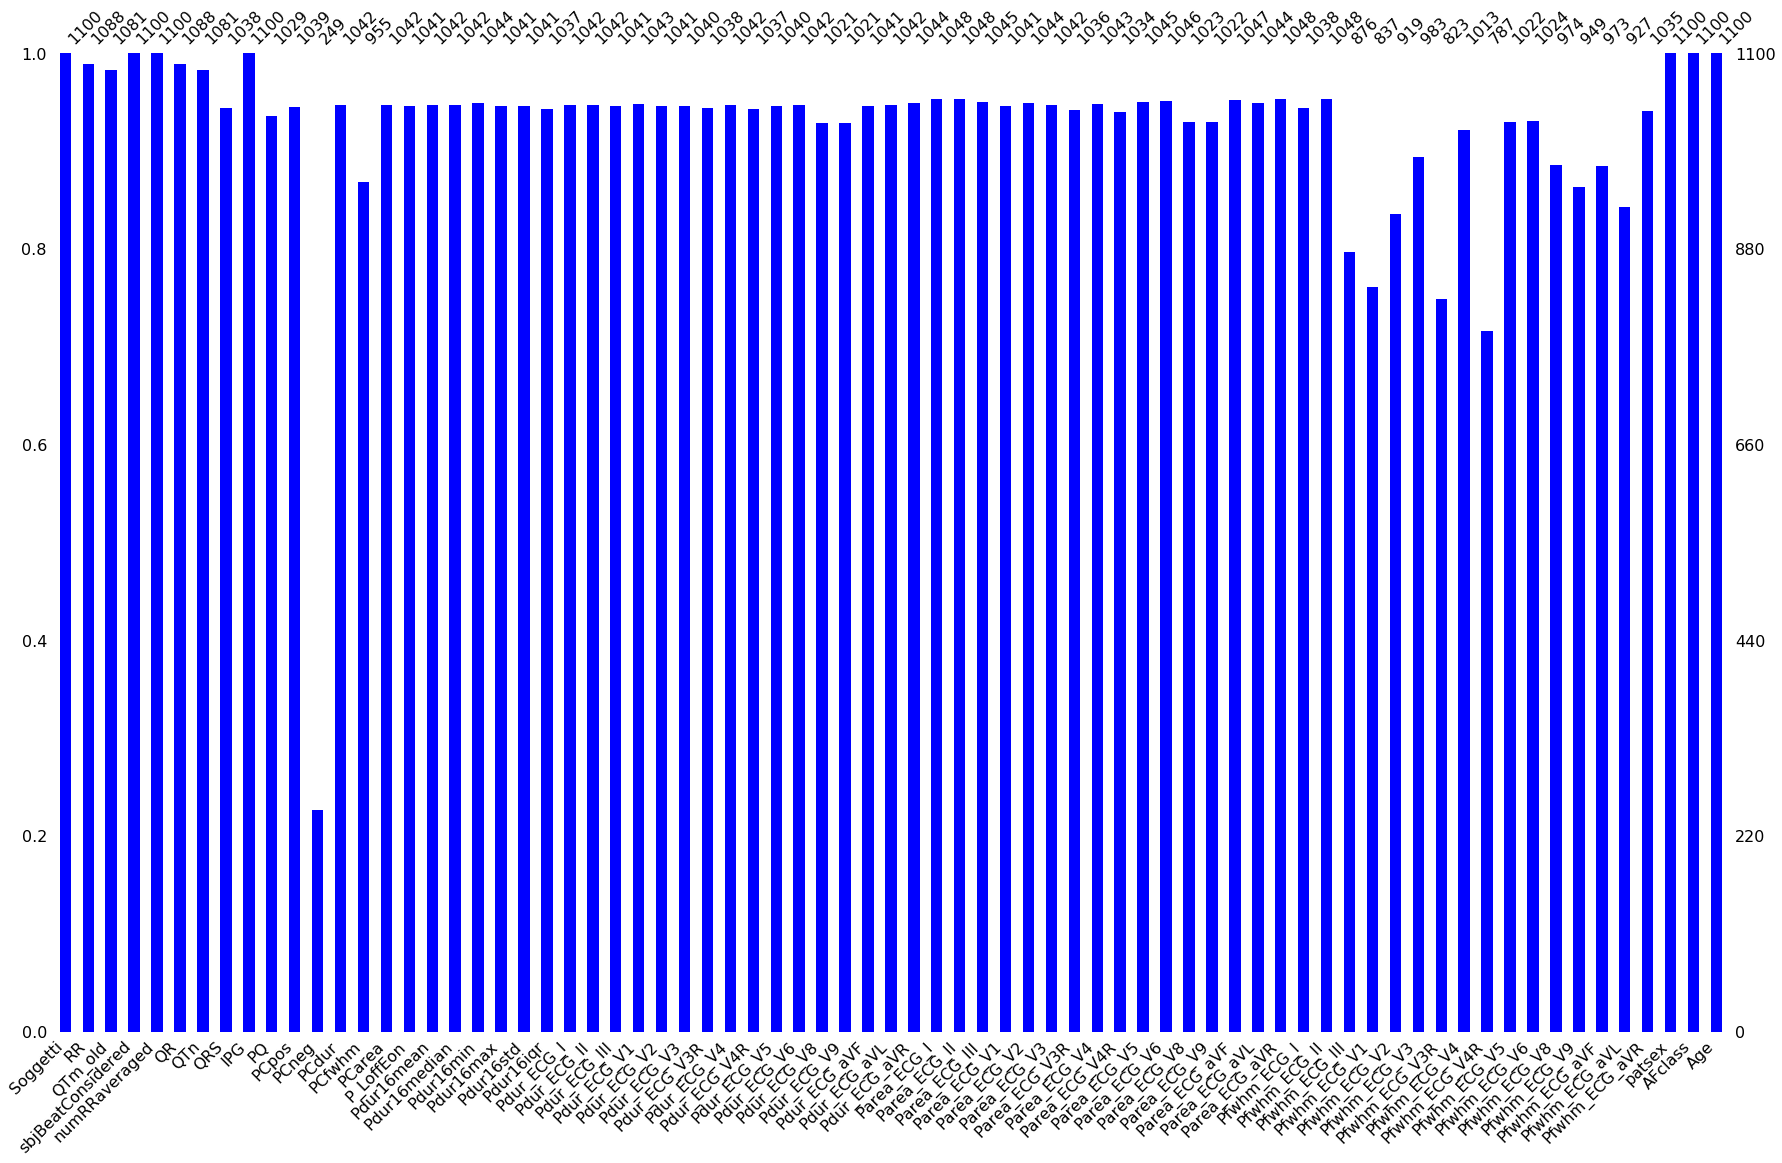

In [5]:
msno.bar(df, color="blue",figsize=(30,18),labels = True);

### Correlation Heatmap for Missing Values

This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1). Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

- Nullity correlation ranges from `-1` (if one variable appears the other definitely does not) to `0` (variables appearing or not appearing have no effect on one another) to `1` (if one variable appears the other definitely also does).
- Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.
- Entries marked `< 1` or `> -1` are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous.

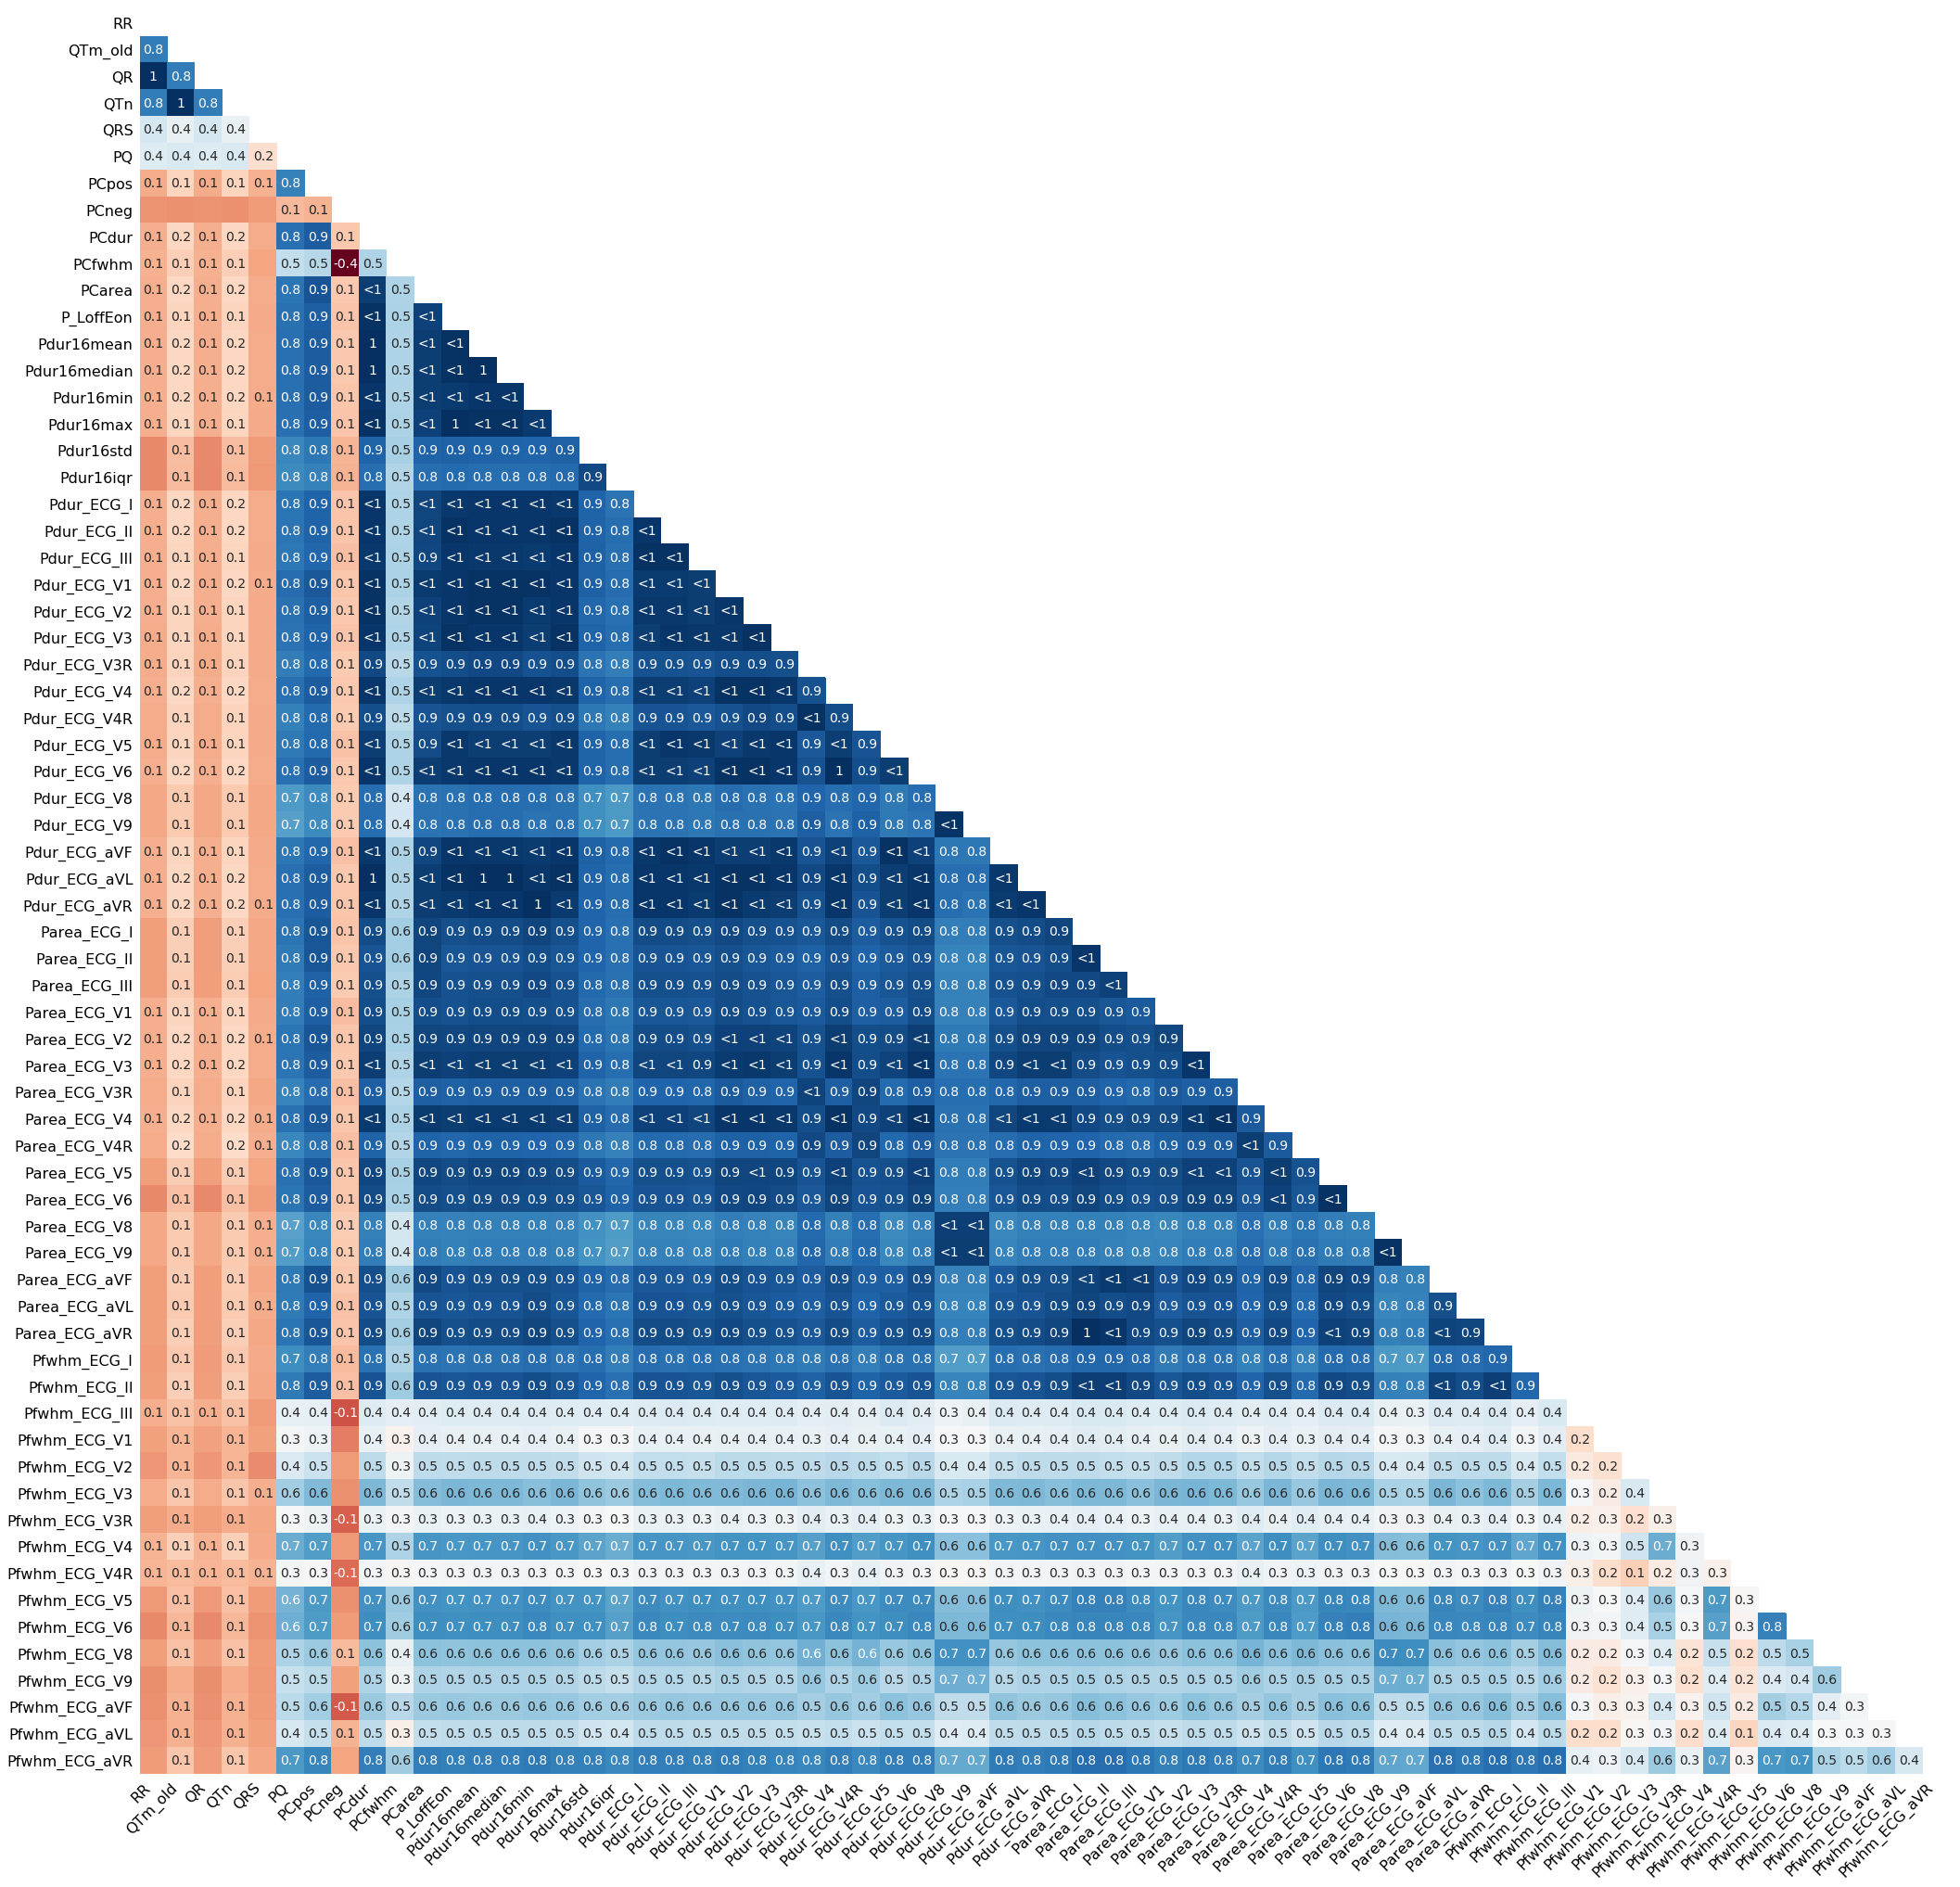

In [6]:
msno.heatmap(df, figsize=(35,35));

### Dendrogram

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity,then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

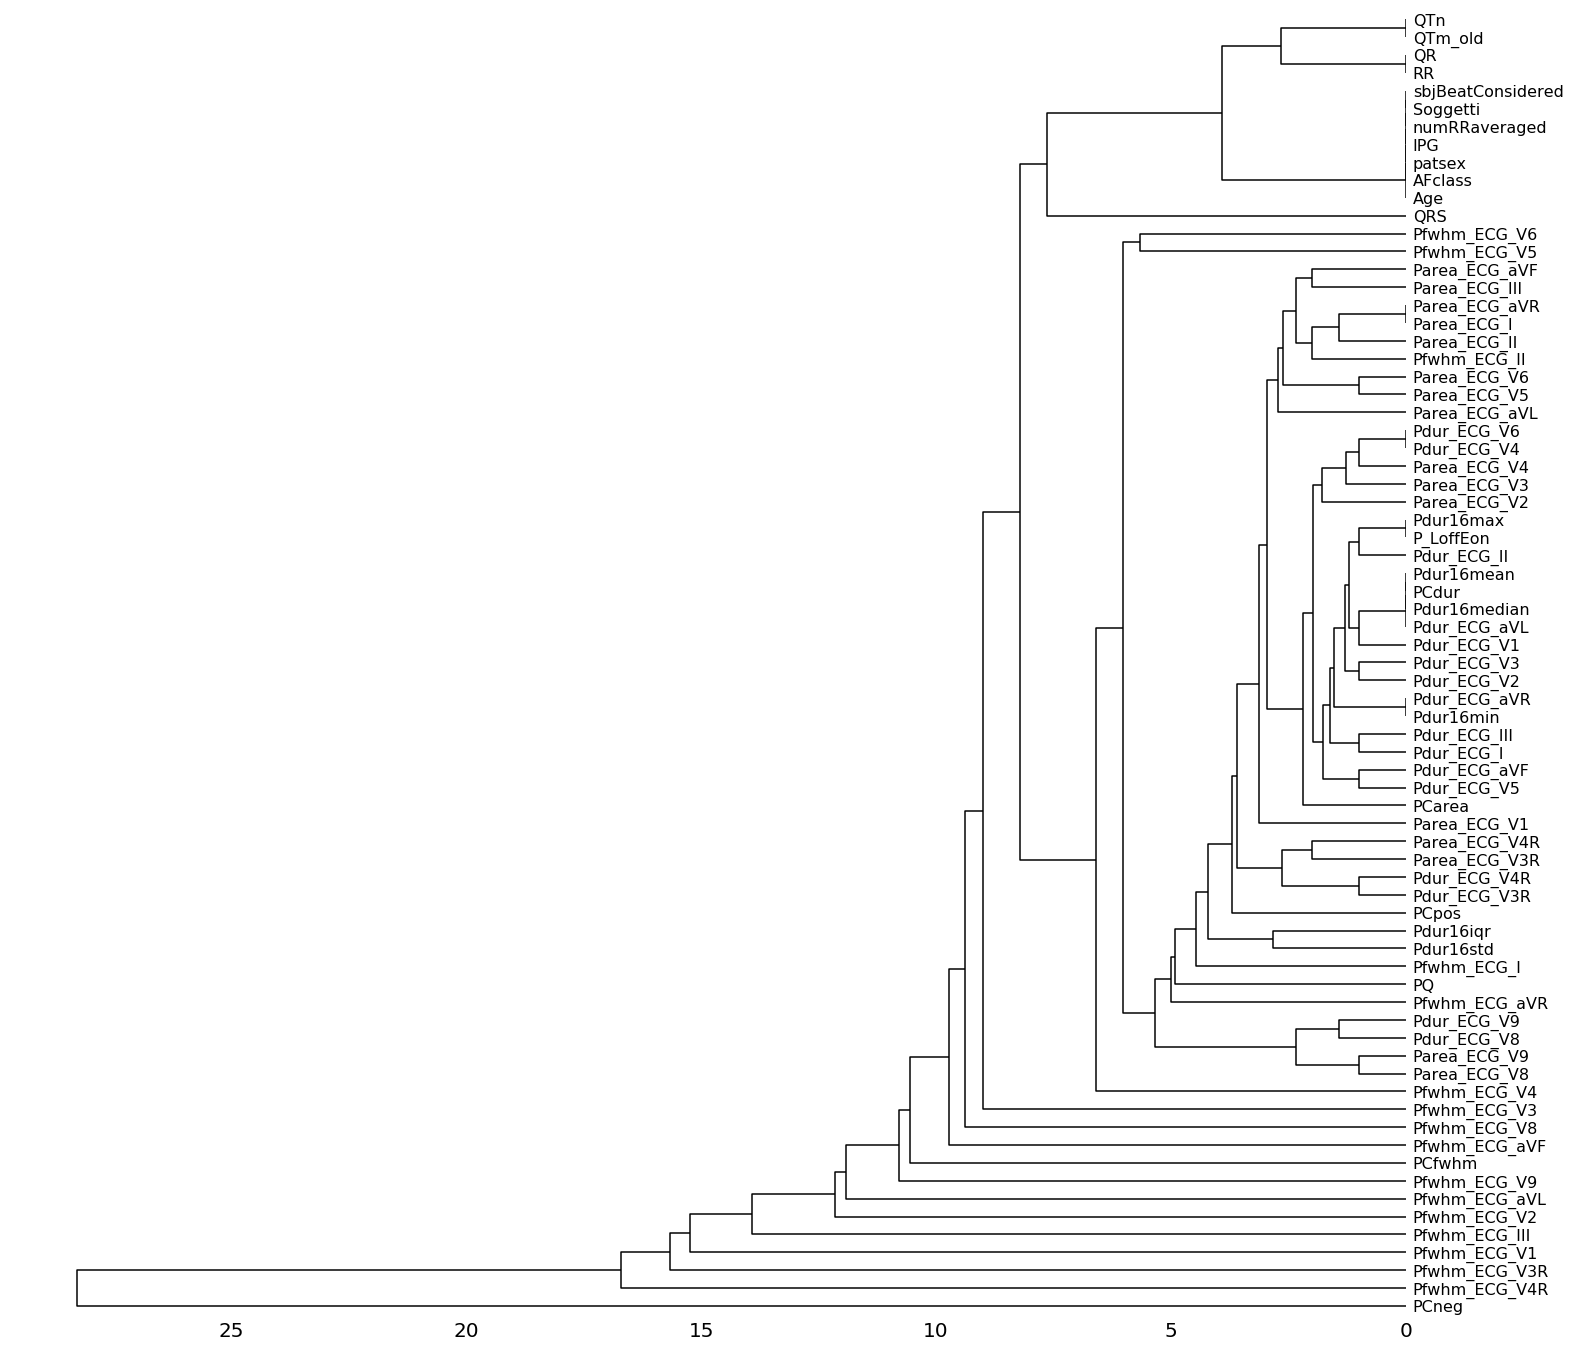

In [7]:
msno.dendrogram(df);

## Imputation

### PCNeg

/Users/refikcanmalli/anaconda3/envs/mdp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


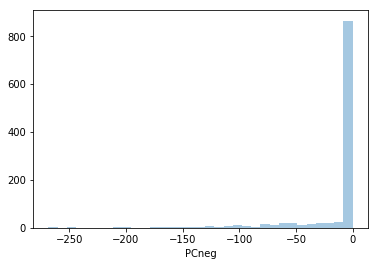

In [14]:
df['PCneg'].fillna(0, inplace=True)
sns.distplot(df['PCneg'], kde=False, rug=False);

/Users/refikcanmalli/anaconda3/envs/mdp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


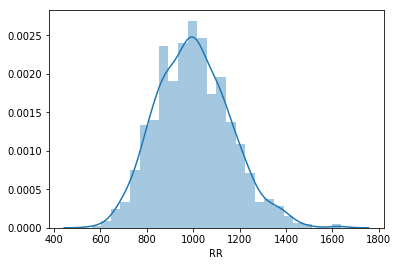

In [27]:

sns.distplot(df['RR'].dropna(), kde=True, rug=False);

### IPG

/Users/refikcanmalli/anaconda3/envs/mdp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


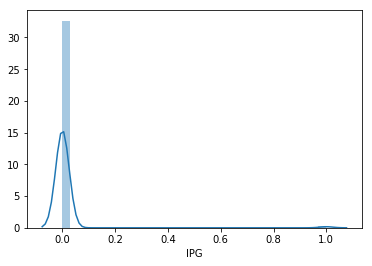

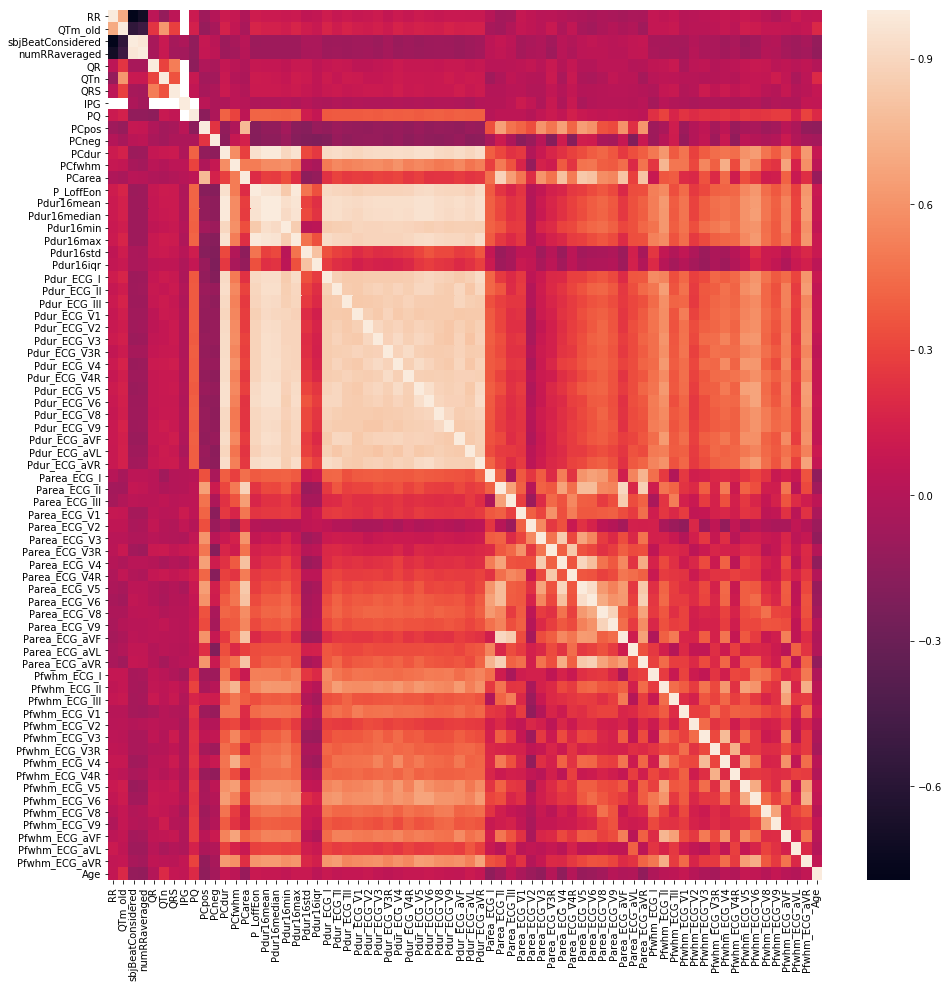

In [20]:
sns.distplot(df['IPG']);
corr = df.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [24]:
df1 = df[['IPG','RR','QTm_old','QR','QTn']]
df1.sample(10)

,IPG,RR,QTm_old,QR,QTn
174,1,NaN,NaN,NaN,NaN
170,0,1105.285141,397.0,39.0,377.618568
537,0,965.598540,385.0,32.0,391.798194
341,0,987.175084,375.0,33.0,377.428052
436,0,1114.079051,390.0,37.0,369.493330
229,0,890.262948,403.0,32.0,427.116055
273,0,1610.932331,520.0,35.0,409.698803
437,0,644.141304,NaN,24.0,NaN
123,0,1117.991632,442.0,58.0,418.025710
533,0,1107.353659,390.0,43.0,370.613670


In [28]:
from sklearn.model_selection import cross_val_score
dummy_df = df.fillna(-9999)
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))